In [1]:
import warnings
warnings.filterwarnings("ignore")

# standard libraries
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data_pubg=pd.read_csv("PUBG_Game_Prediction_data.csv")

In [4]:
data_pubg.shape

(4446966, 29)

In [6]:
data_pubg.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
data_pubg=data_pubg.dropna()

In [8]:
data_pubg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [9]:
data_pubg.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [9]:
data_pubg['PlayerJoined']=data_pubg.groupby("matchId")["matchId"].transform('count')

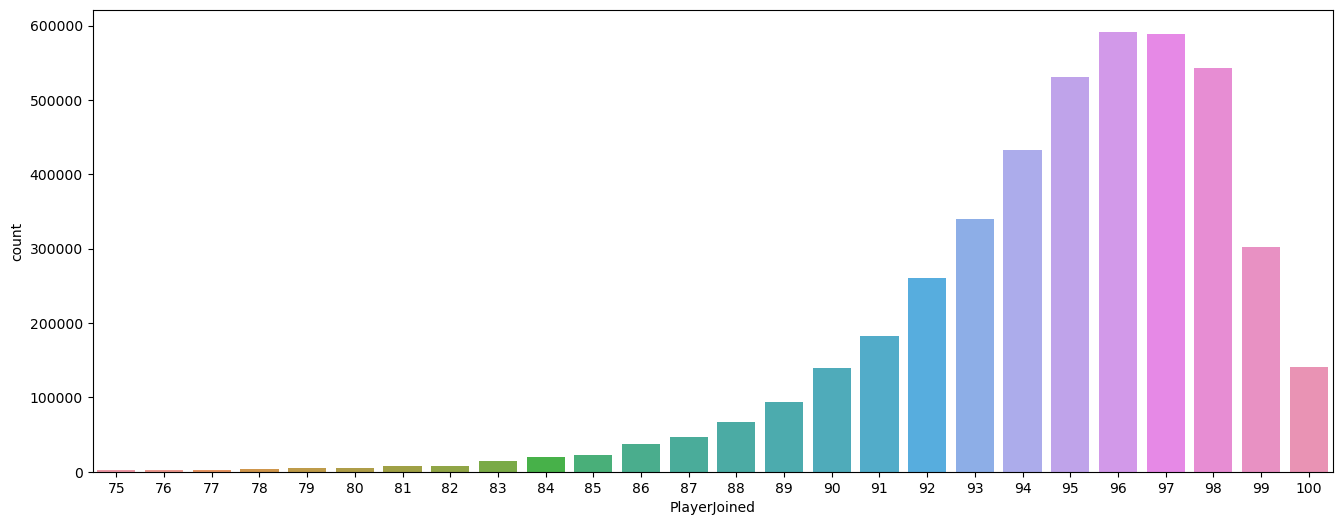

In [10]:

sns.countplot(x=data_pubg[data_pubg['PlayerJoined']>=75]['PlayerJoined'])
plt.show()

In [11]:
data_pubg["Total Distance"]=data_pubg["walkDistance"]+data_pubg["rideDistance"]+data_pubg["swimDistance"]

In [12]:
data_pubg=data_pubg.drop(data_pubg[(data_pubg["Total Distance"]==0) & (data_pubg["kills"]>0)].index)

In [14]:
data_pubg=data_pubg.drop(data_pubg[(data_pubg["roadKills"]>5)].index)

<Axes: xlabel='kills', ylabel='count'>

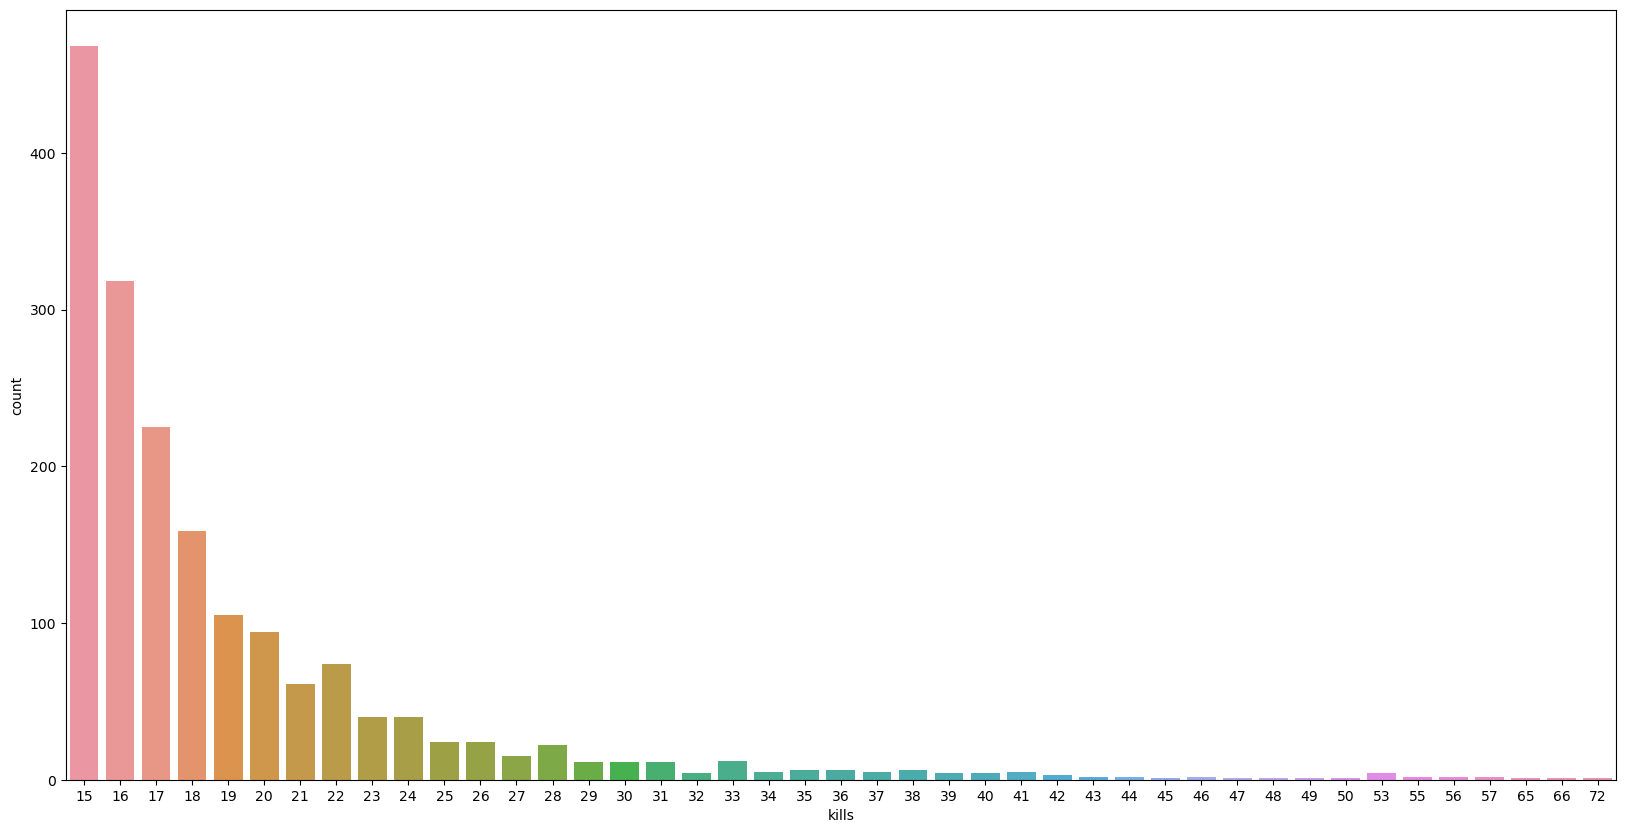

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x=data_pubg[data_pubg['kills']>=15]['kills'])


In [16]:
data_pubg=data_pubg.drop(data_pubg[(data_pubg["kills"]>20)].index)

In [21]:
data_pubg["Head_rate"]=data_pubg["headshotKills"]/data_pubg["kills"]

In [22]:
data_pubg['Head_rate'] = data_pubg['Head_rate'].fillna(0)

<Axes: xlabel='Head_rate', ylabel='Count'>

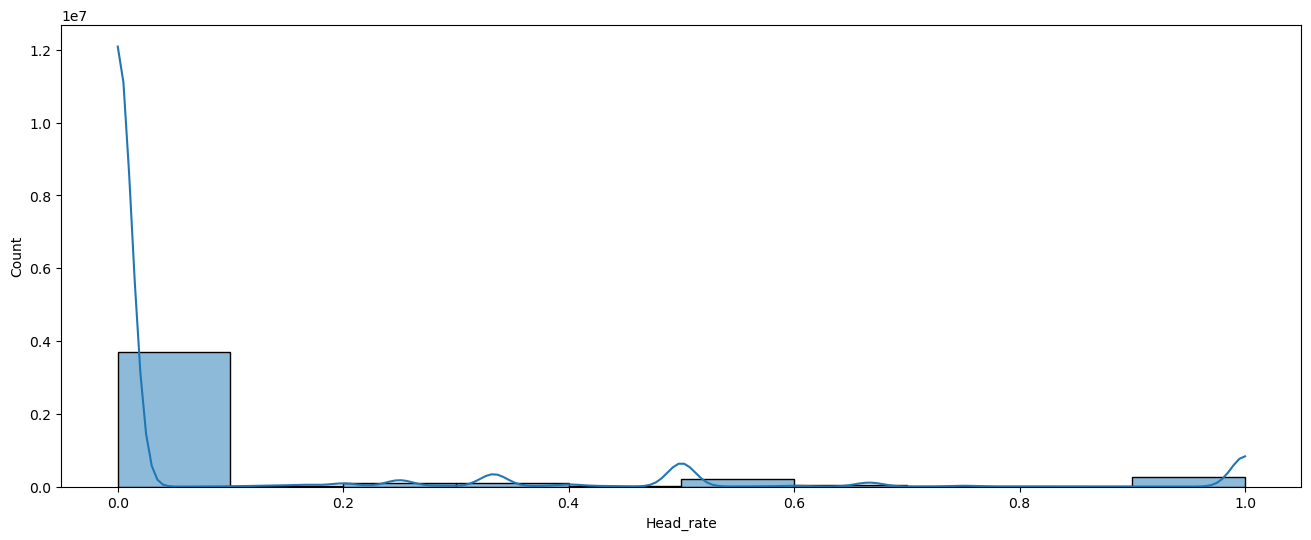

In [23]:
sns.histplot(x=data_pubg["Head_rate"],kde=True,bins =10)

<Axes: ylabel='Density'>

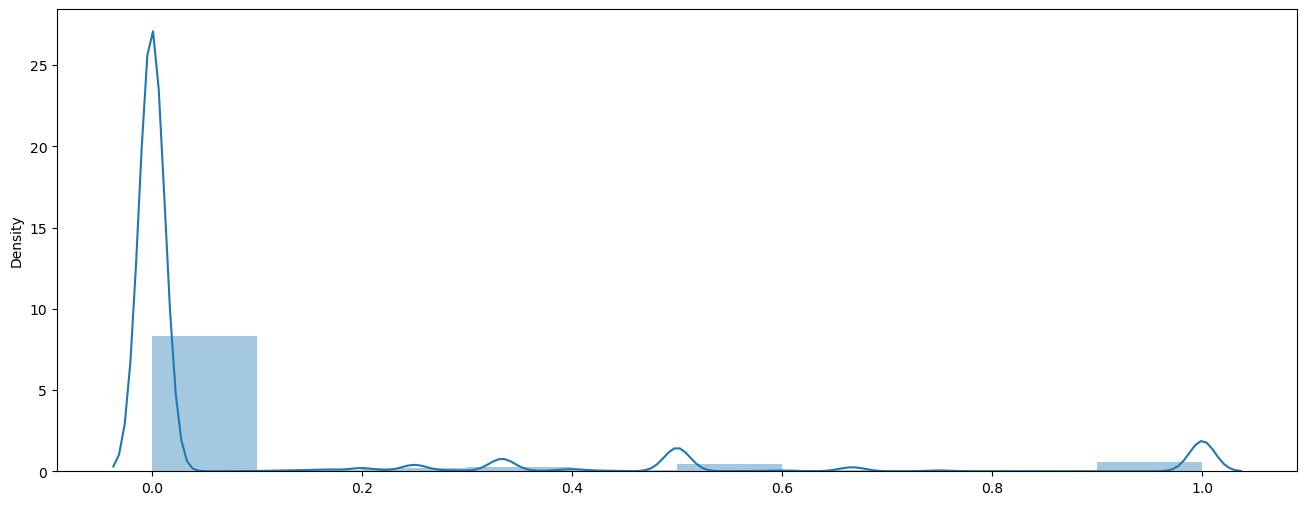

In [24]:
sns.distplot(x=data_pubg["Head_rate"] ,bins =10)

In [25]:
data_pubg.drop(data_pubg[(data_pubg['Head_rate'] == 1)& (data_pubg['kills'] > 6)].index, inplace = True)

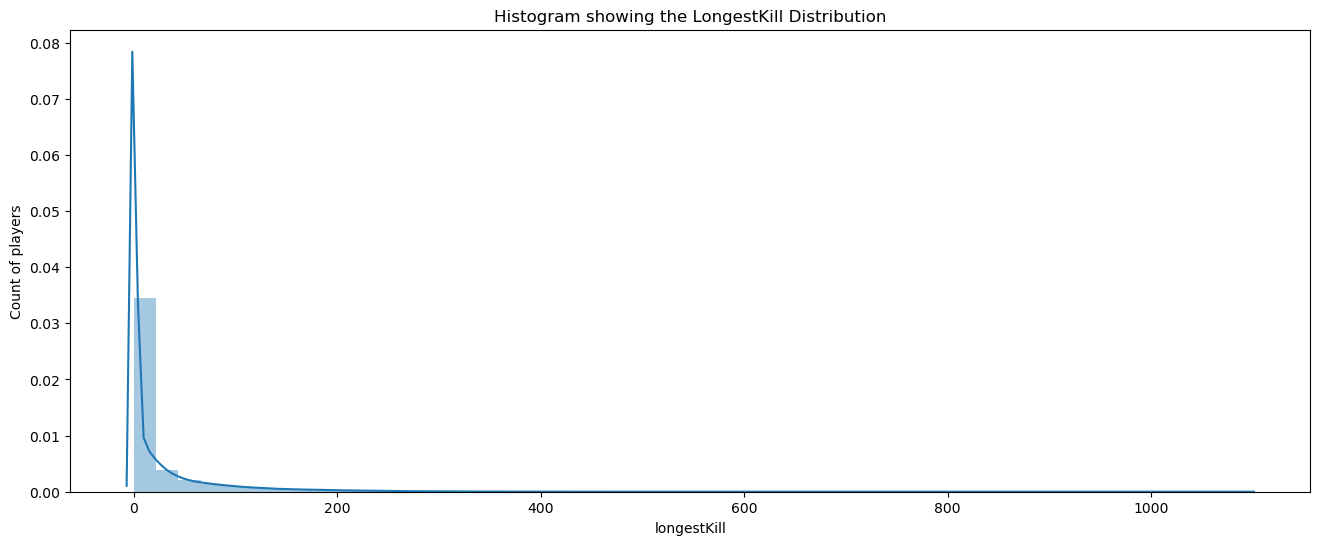

In [26]:
sns.distplot(data_pubg['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [27]:
data_pubg.drop(data_pubg[(data_pubg['longestKill'] >=500)].index,inplace=True)

<Axes: xlabel='weaponsAcquired', ylabel='count'>

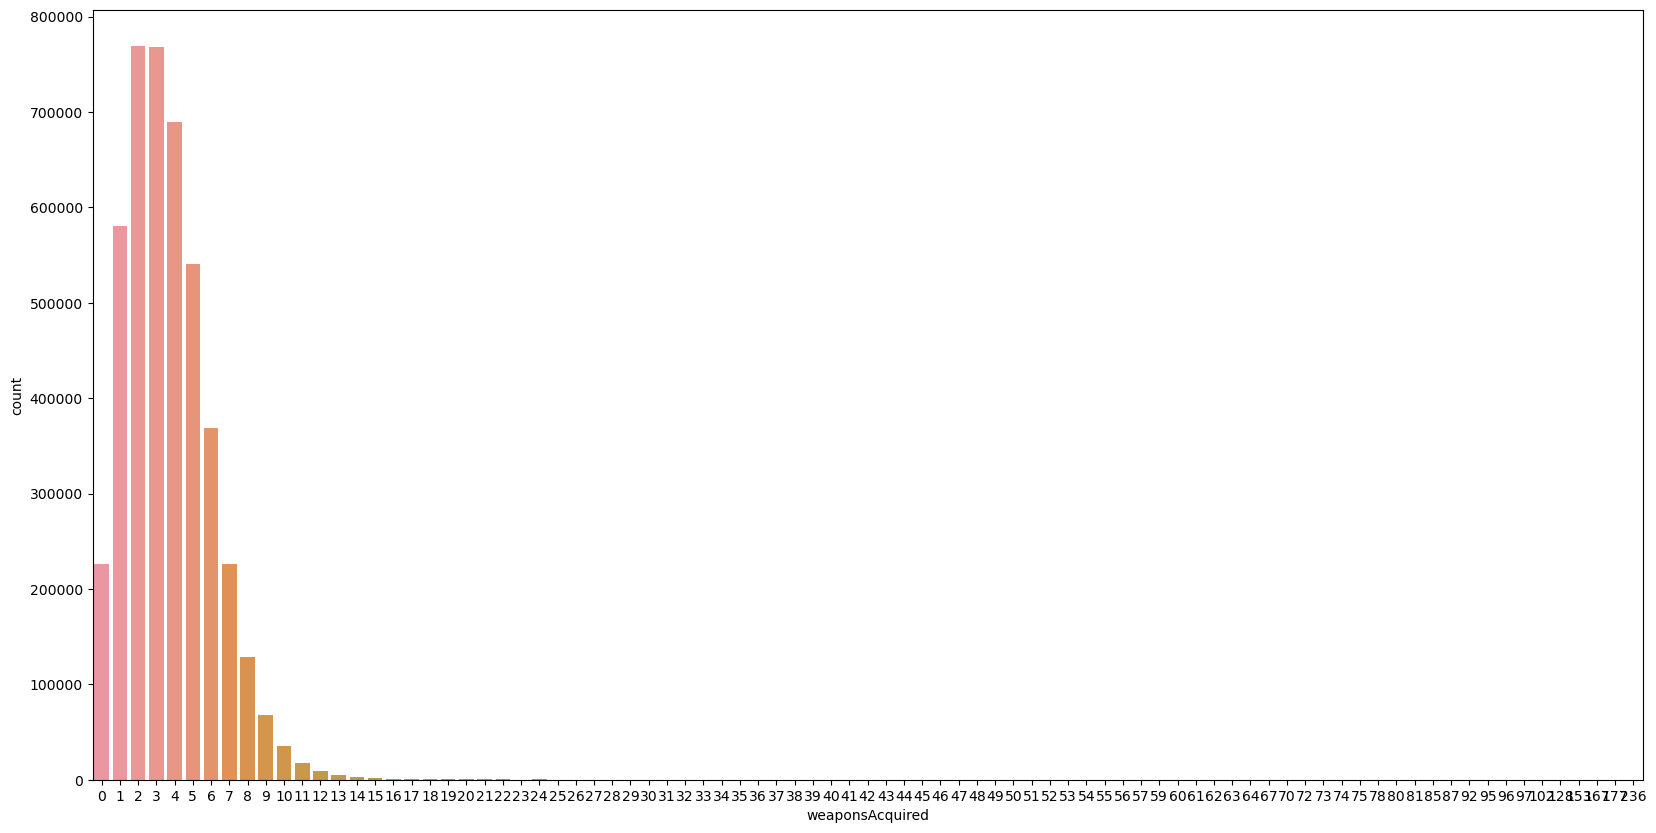

In [28]:
plt.figure(figsize=(20,10))

sns.countplot(x=data_pubg["weaponsAcquired"])

In [29]:
data_pubg.drop(data_pubg[data_pubg['weaponsAcquired']>=15].index, inplace = True)

In [ ]:
data_pubg.isnull().sum()

<Axes: >

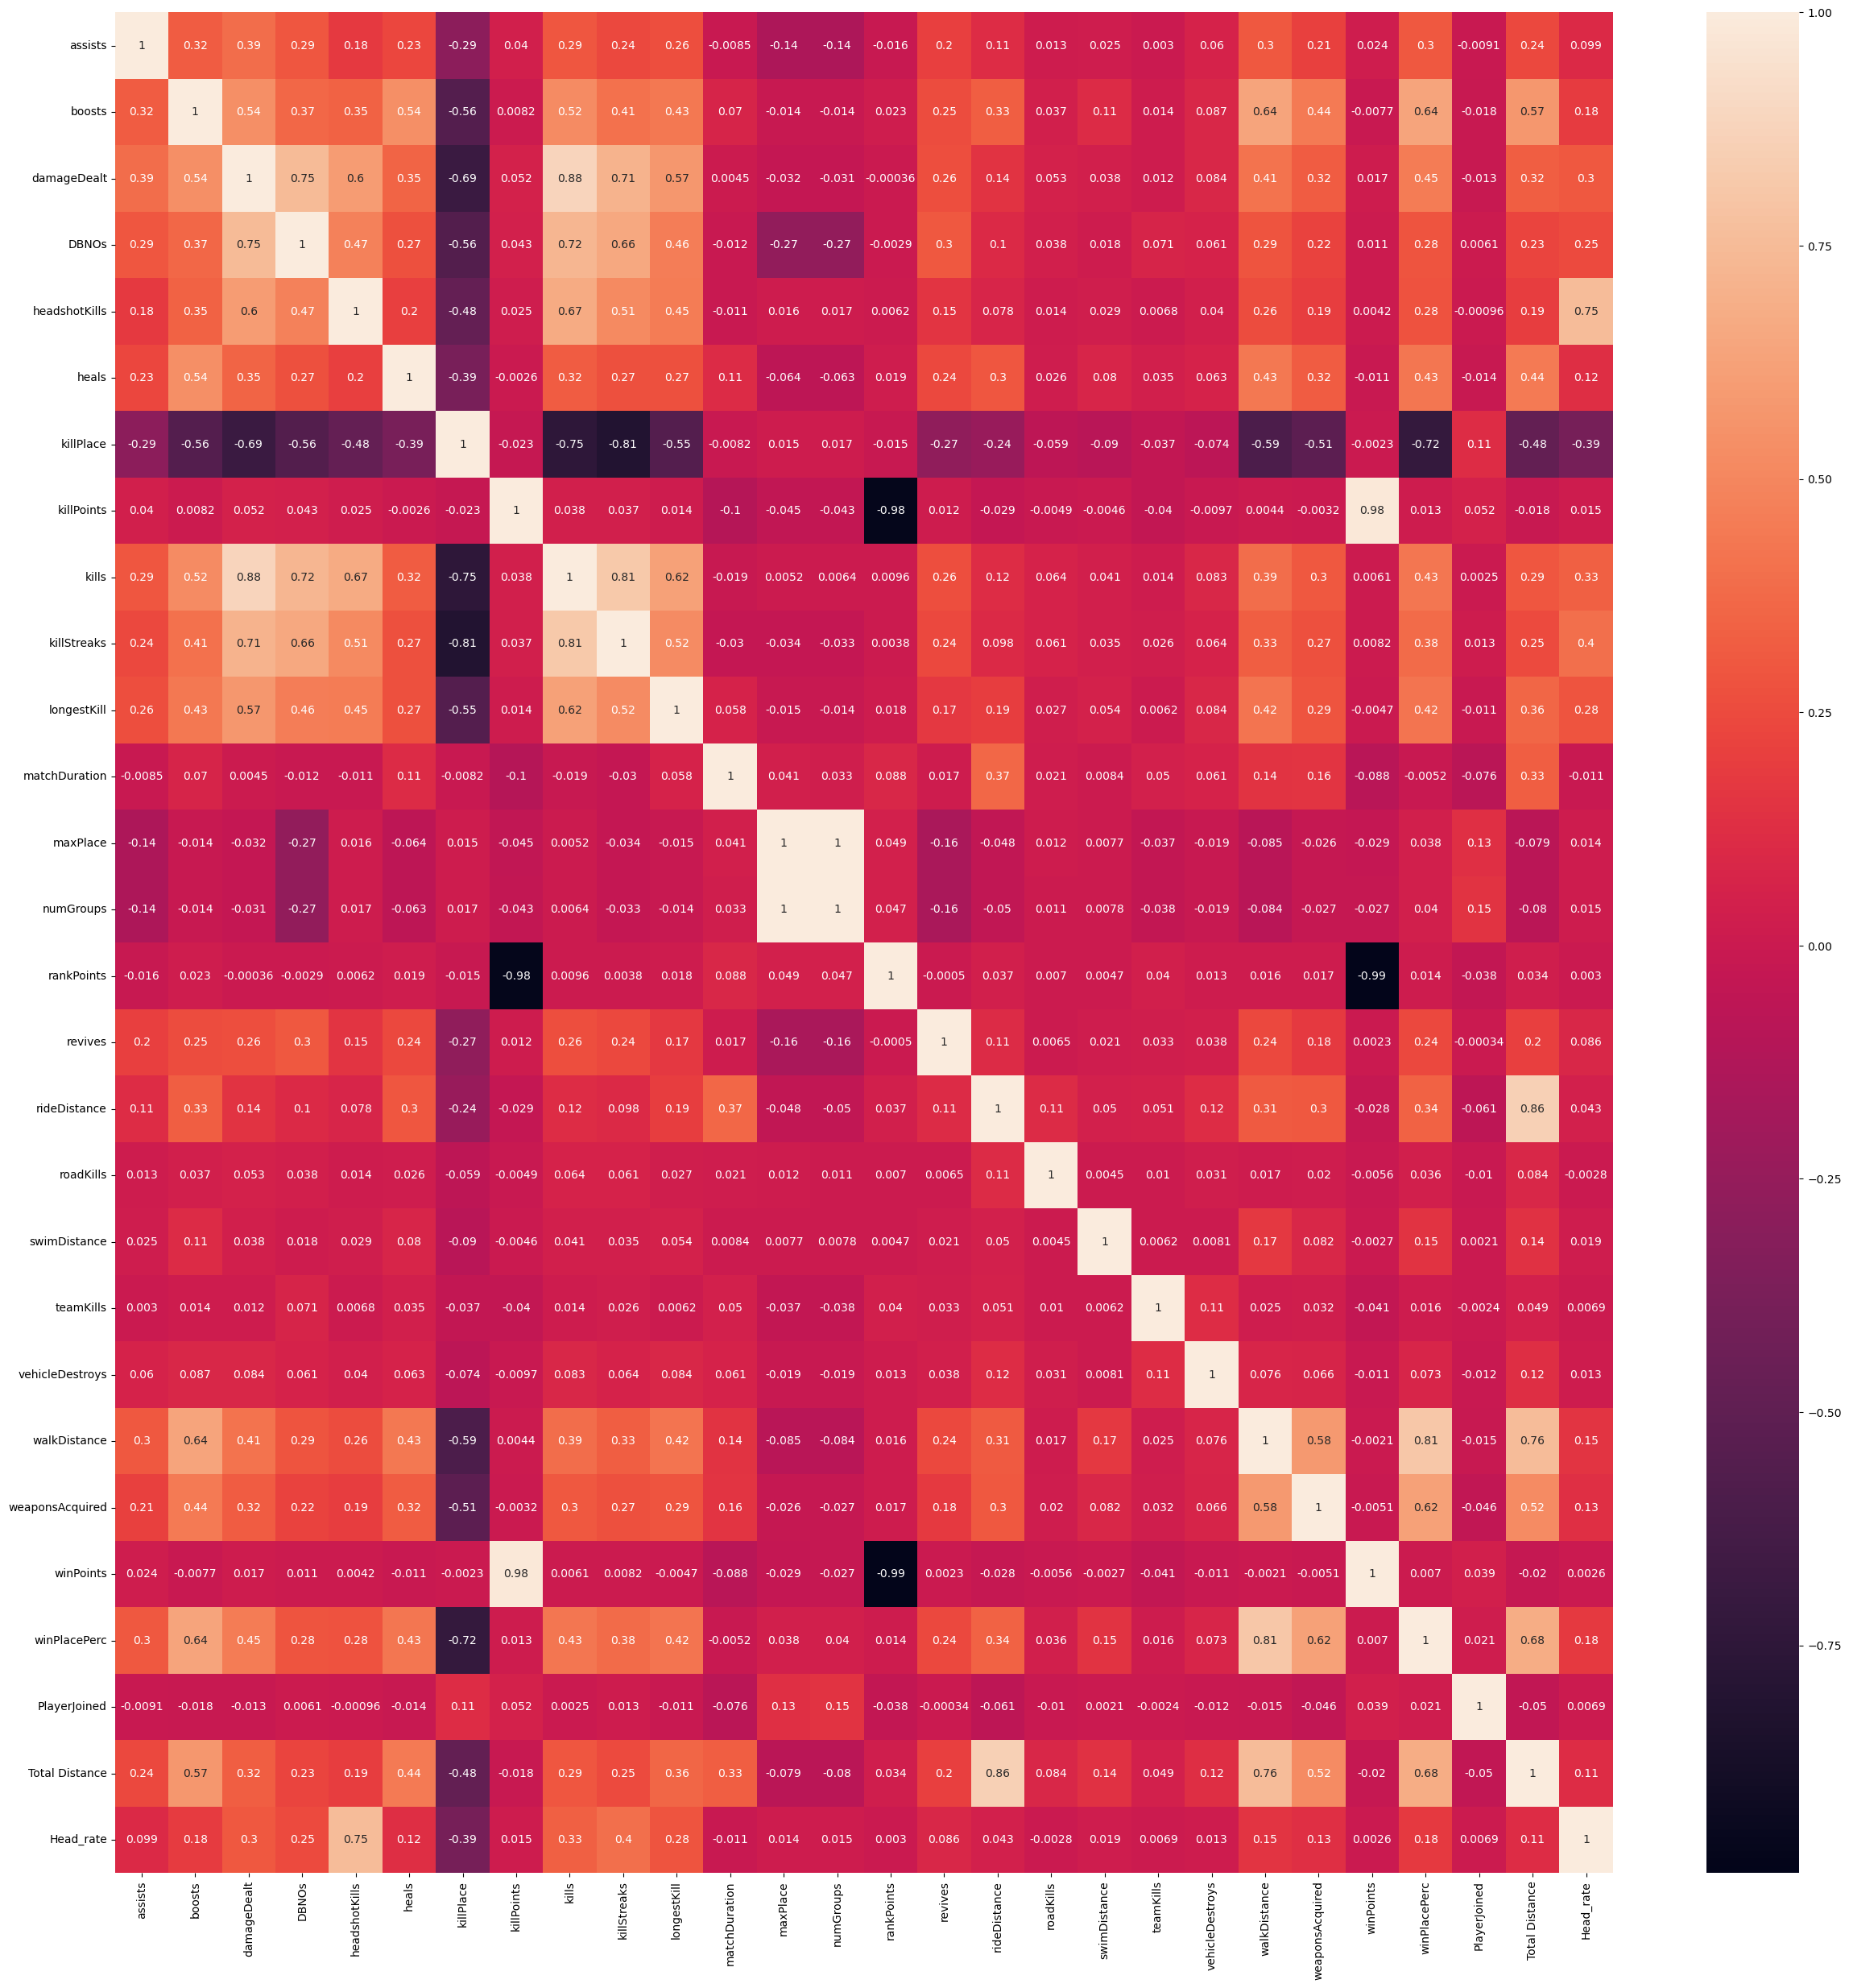

In [30]:
plt.figure(figsize=(30,30))

sns.heatmap(data_pubg.corr(),annot=True)

In [31]:
data_pubg['killswithoutMoving'] = ((data_pubg['kills']>0) & (data_pubg['Total Distance'] ==0))

In [32]:
normalising_factor = (100 - data_pubg['PlayerJoined']/100)+1
data_pubg['killsNorm'] = data_pubg['kills'] * normalising_factor
data_pubg['damageDealtNorm'] = data_pubg['damageDealt'] * normalising_factor
data_pubg['maxPlaceNorm'] = data_pubg['maxPlace'] * normalising_factor
data_pubg['matchDurationNorm'] = data_pubg['matchDuration'] * normalising_factor


data_pubg['traveldistance'] = data_pubg['walkDistance'] + data_pubg['swimDistance'] + data_pubg['rideDistance']
data_pubg['healsnboosts'] = data_pubg['heals'] + data_pubg['boosts']
data_pubg['assist'] = data_pubg['assists'] + data_pubg['revives']

In [33]:
data = data_pubg.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [70]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [ ]:
data

In [72]:
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [ ]:
features = x.columns

In [73]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [74]:
features

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'PlayerJoined',
       'Total Distance', 'Head_rate', 'killsNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm', 'traveldistance', 'healsnboosts',
       'assist', 'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'killswithoutMoving_False'],
      dtype='object')

In [37]:
import catboost as cb

In [38]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)


In [39]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [40]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [41]:
grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5482016	test: 0.5479886	best: 0.5479886 (0)	total: 527ms	remaining: 52.2s
1:	learn: 0.5333650	test: 0.5331566	best: 0.5331566 (1)	total: 752ms	remaining: 36.8s
2:	learn: 0.5189826	test: 0.5187815	best: 0.5187815 (2)	total: 960ms	remaining: 31s
3:	learn: 0.5050844	test: 0.5048926	best: 0.5048926 (3)	total: 1.18s	remaining: 28.3s
4:	learn: 0.4916276	test: 0.4914432	best: 0.4914432 (4)	total: 1.38s	remaining: 26.1s
5:	learn: 0.4786251	test: 0.4784449	best: 0.4784449 (5)	total: 1.58s	remaining: 24.8s
6:	learn: 0.4660267	test: 0.4658539	best: 0.4658539 (6)	total: 1.83s	remaining: 24.3s
7:	learn: 0.4538495	test: 0.4536820	best: 0.4536820 (7)	total: 2.09s	remaining: 24s
8:	learn: 0.4420341	test: 0.4418693	best: 0.4418693 (8)	total: 2.32s	remaining: 23.5s
9:	learn: 0.4306331	test: 0.4304748	best: 0.4304748 (9)	total: 2.55s	remaining: 22.9s
10:	learn: 0.4195967	test: 0.4194453	best: 0.4194453 (10)	total: 2.75s	remaining: 22.2s
11:	learn: 0.4089243	test: 0.4087765	best: 0.4087765 (11

95:	learn: 0.1394478	test: 0.1395405	best: 0.1395405 (95)	total: 19s	remaining: 791ms
96:	learn: 0.1390753	test: 0.1391697	best: 0.1391697 (96)	total: 19.1s	remaining: 592ms
97:	learn: 0.1387199	test: 0.1388151	best: 0.1388151 (97)	total: 19.3s	remaining: 394ms
98:	learn: 0.1383766	test: 0.1384732	best: 0.1384732 (98)	total: 19.5s	remaining: 197ms
99:	learn: 0.1380397	test: 0.1381367	best: 0.1381367 (99)	total: 19.7s	remaining: 0us

bestTest = 0.1381366755
bestIteration = 99

0:	loss: 0.1381367	best: 0.1381367 (0)	total: 23.3s	remaining: 5m 48s
0:	learn: 0.5126068	test: 0.5124096	best: 0.5124096 (0)	total: 197ms	remaining: 19.5s
1:	learn: 0.4671679	test: 0.4669991	best: 0.4669991 (1)	total: 395ms	remaining: 19.4s
2:	learn: 0.4264429	test: 0.4262951	best: 0.4262951 (2)	total: 581ms	remaining: 18.8s
3:	learn: 0.3902182	test: 0.3900853	best: 0.3900853 (3)	total: 771ms	remaining: 18.5s
4:	learn: 0.3581625	test: 0.3580502	best: 0.3580502 (4)	total: 954ms	remaining: 18.1s
5:	learn: 0.3295063

88:	learn: 0.1174285	test: 0.1176647	best: 0.1176647 (88)	total: 16.1s	remaining: 1.98s
89:	learn: 0.1171031	test: 0.1173483	best: 0.1173483 (89)	total: 16.2s	remaining: 1.8s
90:	learn: 0.1170075	test: 0.1172519	best: 0.1172519 (90)	total: 16.4s	remaining: 1.62s
91:	learn: 0.1169191	test: 0.1171636	best: 0.1171636 (91)	total: 16.6s	remaining: 1.44s
92:	learn: 0.1168242	test: 0.1170669	best: 0.1170669 (92)	total: 16.7s	remaining: 1.26s
93:	learn: 0.1167374	test: 0.1169829	best: 0.1169829 (93)	total: 16.9s	remaining: 1.08s
94:	learn: 0.1166427	test: 0.1168850	best: 0.1168850 (94)	total: 17s	remaining: 897ms
95:	learn: 0.1165224	test: 0.1167628	best: 0.1167628 (95)	total: 17.2s	remaining: 718ms
96:	learn: 0.1164136	test: 0.1166544	best: 0.1166544 (96)	total: 17.4s	remaining: 538ms
97:	learn: 0.1163231	test: 0.1165631	best: 0.1165631 (97)	total: 17.6s	remaining: 359ms
98:	learn: 0.1162409	test: 0.1164784	best: 0.1164784 (98)	total: 17.7s	remaining: 179ms
99:	learn: 0.1161663	test: 0.116406

81:	learn: 0.1466753	test: 0.1467577	best: 0.1467577 (81)	total: 14.5s	remaining: 12s
82:	learn: 0.1459917	test: 0.1460750	best: 0.1460750 (82)	total: 14.7s	remaining: 11.9s
83:	learn: 0.1453945	test: 0.1454773	best: 0.1454773 (83)	total: 14.9s	remaining: 11.7s
84:	learn: 0.1448061	test: 0.1448892	best: 0.1448892 (84)	total: 15s	remaining: 11.5s
85:	learn: 0.1441889	test: 0.1442730	best: 0.1442730 (85)	total: 15.2s	remaining: 11.3s
86:	learn: 0.1436574	test: 0.1437424	best: 0.1437424 (86)	total: 15.4s	remaining: 11.2s
87:	learn: 0.1431242	test: 0.1432099	best: 0.1432099 (87)	total: 15.6s	remaining: 11s
88:	learn: 0.1425612	test: 0.1426476	best: 0.1426476 (88)	total: 15.8s	remaining: 10.8s
89:	learn: 0.1420826	test: 0.1421694	best: 0.1421694 (89)	total: 15.9s	remaining: 10.6s
90:	learn: 0.1416257	test: 0.1417131	best: 0.1417131 (90)	total: 16.1s	remaining: 10.4s
91:	learn: 0.1411889	test: 0.1412785	best: 0.1412785 (91)	total: 16.3s	remaining: 10.3s
92:	learn: 0.1407061	test: 0.1407970	b

24:	learn: 0.1445245	test: 0.1446326	best: 0.1446326 (24)	total: 4.43s	remaining: 22.1s
25:	learn: 0.1428209	test: 0.1429318	best: 0.1429318 (25)	total: 4.6s	remaining: 21.9s
26:	learn: 0.1411019	test: 0.1412206	best: 0.1412206 (26)	total: 4.78s	remaining: 21.8s
27:	learn: 0.1397763	test: 0.1398917	best: 0.1398917 (27)	total: 4.95s	remaining: 21.6s
28:	learn: 0.1385976	test: 0.1387311	best: 0.1387311 (28)	total: 5.12s	remaining: 21.4s
29:	learn: 0.1374581	test: 0.1375932	best: 0.1375932 (29)	total: 5.31s	remaining: 21.2s
30:	learn: 0.1362990	test: 0.1364387	best: 0.1364387 (30)	total: 5.48s	remaining: 21s
31:	learn: 0.1354159	test: 0.1355534	best: 0.1355534 (31)	total: 5.64s	remaining: 20.8s
32:	learn: 0.1346504	test: 0.1347928	best: 0.1347928 (32)	total: 5.81s	remaining: 20.6s
33:	learn: 0.1337834	test: 0.1339284	best: 0.1339284 (33)	total: 5.98s	remaining: 20.4s
34:	learn: 0.1330728	test: 0.1332271	best: 0.1332271 (34)	total: 6.15s	remaining: 20.2s
35:	learn: 0.1324924	test: 0.132652

118:	learn: 0.1135590	test: 0.1137919	best: 0.1137919 (118)	total: 21s	remaining: 5.48s
119:	learn: 0.1134379	test: 0.1136698	best: 0.1136698 (119)	total: 21.2s	remaining: 5.3s
120:	learn: 0.1133694	test: 0.1135985	best: 0.1135985 (120)	total: 21.4s	remaining: 5.13s
121:	learn: 0.1133185	test: 0.1135468	best: 0.1135468 (121)	total: 21.6s	remaining: 4.95s
122:	learn: 0.1132164	test: 0.1134445	best: 0.1134445 (122)	total: 21.7s	remaining: 4.77s
123:	learn: 0.1131634	test: 0.1133929	best: 0.1133929 (123)	total: 21.9s	remaining: 4.59s
124:	learn: 0.1128980	test: 0.1131247	best: 0.1131247 (124)	total: 22.1s	remaining: 4.41s
125:	learn: 0.1126908	test: 0.1129179	best: 0.1129179 (125)	total: 22.3s	remaining: 4.24s
126:	learn: 0.1125661	test: 0.1127893	best: 0.1127893 (126)	total: 22.4s	remaining: 4.06s
127:	learn: 0.1122374	test: 0.1124655	best: 0.1124655 (127)	total: 22.6s	remaining: 3.89s
128:	learn: 0.1121722	test: 0.1123991	best: 0.1123991 (128)	total: 22.8s	remaining: 3.71s
129:	learn: 0

60:	learn: 0.1529240	test: 0.1530538	best: 0.1530538 (60)	total: 15s	remaining: 9.61s
61:	learn: 0.1512431	test: 0.1513749	best: 0.1513749 (61)	total: 15.3s	remaining: 9.36s
62:	learn: 0.1496426	test: 0.1497763	best: 0.1497763 (62)	total: 15.5s	remaining: 9.1s
63:	learn: 0.1480579	test: 0.1481975	best: 0.1481975 (63)	total: 15.7s	remaining: 8.86s
64:	learn: 0.1465855	test: 0.1467283	best: 0.1467283 (64)	total: 16s	remaining: 8.62s
65:	learn: 0.1451749	test: 0.1453197	best: 0.1453197 (65)	total: 16.2s	remaining: 8.37s
66:	learn: 0.1437990	test: 0.1439497	best: 0.1439497 (66)	total: 16.5s	remaining: 8.12s
67:	learn: 0.1425113	test: 0.1426640	best: 0.1426640 (67)	total: 16.7s	remaining: 7.87s
68:	learn: 0.1412931	test: 0.1414479	best: 0.1414479 (68)	total: 17s	remaining: 7.62s
69:	learn: 0.1401193	test: 0.1402762	best: 0.1402762 (69)	total: 17.2s	remaining: 7.36s
70:	learn: 0.1389903	test: 0.1391496	best: 0.1391496 (70)	total: 17.4s	remaining: 7.11s
71:	learn: 0.1379014	test: 0.1380643	be

53:	learn: 0.1053066	test: 0.1055544	best: 0.1055544 (53)	total: 12.9s	remaining: 11s
54:	learn: 0.1051164	test: 0.1053633	best: 0.1053633 (54)	total: 13.2s	remaining: 10.8s
55:	learn: 0.1047146	test: 0.1049609	best: 0.1049609 (55)	total: 13.4s	remaining: 10.6s
56:	learn: 0.1043936	test: 0.1046379	best: 0.1046379 (56)	total: 13.7s	remaining: 10.3s
57:	learn: 0.1039827	test: 0.1042228	best: 0.1042228 (57)	total: 13.9s	remaining: 10.1s
58:	learn: 0.1036741	test: 0.1039153	best: 0.1039153 (58)	total: 14.1s	remaining: 9.83s
59:	learn: 0.1035171	test: 0.1037603	best: 0.1037603 (59)	total: 14.4s	remaining: 9.58s
60:	learn: 0.1033076	test: 0.1035475	best: 0.1035475 (60)	total: 14.6s	remaining: 9.32s
61:	learn: 0.1031737	test: 0.1034118	best: 0.1034118 (61)	total: 14.8s	remaining: 9.07s
62:	learn: 0.1030069	test: 0.1032452	best: 0.1032452 (62)	total: 15s	remaining: 8.82s
63:	learn: 0.1026722	test: 0.1029110	best: 0.1029110 (63)	total: 15.3s	remaining: 8.59s
64:	learn: 0.1025396	test: 0.1027791

46:	learn: 0.1861207	test: 0.1861755	best: 0.1861755 (46)	total: 14.5s	remaining: 31.7s
47:	learn: 0.1831541	test: 0.1832117	best: 0.1832117 (47)	total: 15.2s	remaining: 32.3s
48:	learn: 0.1802725	test: 0.1803352	best: 0.1803352 (48)	total: 15.8s	remaining: 32.5s
49:	learn: 0.1774256	test: 0.1774946	best: 0.1774946 (49)	total: 16.3s	remaining: 32.7s
50:	learn: 0.1747731	test: 0.1748430	best: 0.1748430 (50)	total: 16.7s	remaining: 32.5s
51:	learn: 0.1720982	test: 0.1721771	best: 0.1721771 (51)	total: 17.1s	remaining: 32.2s
52:	learn: 0.1696361	test: 0.1697189	best: 0.1697189 (52)	total: 17.4s	remaining: 31.8s
53:	learn: 0.1672795	test: 0.1673655	best: 0.1673655 (53)	total: 17.7s	remaining: 31.5s
54:	learn: 0.1649087	test: 0.1650046	best: 0.1650046 (54)	total: 18s	remaining: 31.1s
55:	learn: 0.1626477	test: 0.1627526	best: 0.1627526 (55)	total: 18.3s	remaining: 30.8s
56:	learn: 0.1605638	test: 0.1606708	best: 0.1606708 (56)	total: 18.6s	remaining: 30.3s
57:	learn: 0.1585607	test: 0.15867

139:	learn: 0.1107175	test: 0.1109536	best: 0.1109536 (139)	total: 44.1s	remaining: 3.15s
140:	learn: 0.1106114	test: 0.1108466	best: 0.1108466 (140)	total: 44.4s	remaining: 2.83s
141:	learn: 0.1103944	test: 0.1106285	best: 0.1106285 (141)	total: 44.7s	remaining: 2.52s
142:	learn: 0.1102008	test: 0.1104337	best: 0.1104337 (142)	total: 45s	remaining: 2.2s
143:	learn: 0.1100776	test: 0.1103110	best: 0.1103110 (143)	total: 45.4s	remaining: 1.89s
144:	learn: 0.1099620	test: 0.1101960	best: 0.1101960 (144)	total: 45.7s	remaining: 1.58s
145:	learn: 0.1098644	test: 0.1100969	best: 0.1100969 (145)	total: 46s	remaining: 1.26s
146:	learn: 0.1097366	test: 0.1099716	best: 0.1099716 (146)	total: 46.3s	remaining: 945ms
147:	learn: 0.1095367	test: 0.1097692	best: 0.1097692 (147)	total: 46.7s	remaining: 631ms
148:	learn: 0.1092982	test: 0.1095318	best: 0.1095318 (148)	total: 47.1s	remaining: 316ms
149:	learn: 0.1090737	test: 0.1093082	best: 0.1093082 (149)	total: 47.4s	remaining: 0us

bestTest = 0.109

82:	learn: 0.0980196	test: 0.0982413	best: 0.0982413 (82)	total: 20s	remaining: 16.2s
83:	learn: 0.0977331	test: 0.0979529	best: 0.0979529 (83)	total: 20.2s	remaining: 15.9s
84:	learn: 0.0976298	test: 0.0978501	best: 0.0978501 (84)	total: 20.4s	remaining: 15.6s
85:	learn: 0.0974253	test: 0.0976420	best: 0.0976420 (85)	total: 20.7s	remaining: 15.4s
86:	learn: 0.0973126	test: 0.0975291	best: 0.0975291 (86)	total: 20.9s	remaining: 15.1s
87:	learn: 0.0970818	test: 0.0973001	best: 0.0973001 (87)	total: 21.2s	remaining: 14.9s
88:	learn: 0.0969424	test: 0.0971628	best: 0.0971628 (88)	total: 21.4s	remaining: 14.7s
89:	learn: 0.0967657	test: 0.0969827	best: 0.0969827 (89)	total: 21.6s	remaining: 14.4s
90:	learn: 0.0966662	test: 0.0968829	best: 0.0968829 (90)	total: 21.8s	remaining: 14.1s
91:	learn: 0.0966012	test: 0.0968178	best: 0.0968178 (91)	total: 22s	remaining: 13.9s
92:	learn: 0.0964290	test: 0.0966429	best: 0.0966429 (92)	total: 22.3s	remaining: 13.7s
93:	learn: 0.0962823	test: 0.0964993

24:	learn: 0.2867370	test: 0.2867260	best: 0.2867260 (24)	total: 8.27s	remaining: 24.8s
25:	learn: 0.2797472	test: 0.2797405	best: 0.2797405 (25)	total: 8.62s	remaining: 24.5s
26:	learn: 0.2729818	test: 0.2729849	best: 0.2729849 (26)	total: 8.98s	remaining: 24.3s
27:	learn: 0.2664793	test: 0.2664859	best: 0.2664859 (27)	total: 9.29s	remaining: 23.9s
28:	learn: 0.2601959	test: 0.2602075	best: 0.2602075 (28)	total: 9.63s	remaining: 23.6s
29:	learn: 0.2541062	test: 0.2541259	best: 0.2541259 (29)	total: 9.96s	remaining: 23.2s
30:	learn: 0.2482311	test: 0.2482559	best: 0.2482559 (30)	total: 10.3s	remaining: 22.9s
31:	learn: 0.2425636	test: 0.2425949	best: 0.2425949 (31)	total: 10.6s	remaining: 22.5s
32:	learn: 0.2371181	test: 0.2371546	best: 0.2371546 (32)	total: 10.9s	remaining: 22.2s
33:	learn: 0.2318326	test: 0.2318775	best: 0.2318775 (33)	total: 11.3s	remaining: 21.8s
34:	learn: 0.2267477	test: 0.2267978	best: 0.2267978 (34)	total: 11.6s	remaining: 21.5s
35:	learn: 0.2218379	test: 0.221

17:	learn: 0.1419283	test: 0.1421236	best: 0.1421236 (17)	total: 5.98s	remaining: 27.2s
18:	learn: 0.1364371	test: 0.1366396	best: 0.1366396 (18)	total: 6.3s	remaining: 26.9s
19:	learn: 0.1314803	test: 0.1316933	best: 0.1316933 (19)	total: 6.63s	remaining: 26.5s
20:	learn: 0.1274223	test: 0.1276467	best: 0.1276467 (20)	total: 6.95s	remaining: 26.1s
21:	learn: 0.1237700	test: 0.1239843	best: 0.1239843 (21)	total: 7.24s	remaining: 25.7s
22:	learn: 0.1207436	test: 0.1209668	best: 0.1209668 (22)	total: 7.55s	remaining: 25.3s
23:	learn: 0.1181650	test: 0.1183936	best: 0.1183936 (23)	total: 7.86s	remaining: 24.9s
24:	learn: 0.1159775	test: 0.1162142	best: 0.1162142 (24)	total: 8.17s	remaining: 24.5s
25:	learn: 0.1141011	test: 0.1143438	best: 0.1143438 (25)	total: 8.47s	remaining: 24.1s
26:	learn: 0.1121106	test: 0.1123619	best: 0.1123619 (26)	total: 8.78s	remaining: 23.7s
27:	learn: 0.1107154	test: 0.1109670	best: 0.1109670 (27)	total: 9.05s	remaining: 23.3s
28:	learn: 0.1094292	test: 0.1096

10:	learn: 0.4140651	test: 0.4139424	best: 0.4139424 (10)	total: 3.63s	remaining: 45.8s
11:	learn: 0.4029057	test: 0.4027910	best: 0.4027910 (11)	total: 3.96s	remaining: 45.5s
12:	learn: 0.3920894	test: 0.3919864	best: 0.3919864 (12)	total: 4.3s	remaining: 45.3s
13:	learn: 0.3816098	test: 0.3815163	best: 0.3815163 (13)	total: 4.64s	remaining: 45s
14:	learn: 0.3714752	test: 0.3713921	best: 0.3713921 (14)	total: 4.98s	remaining: 44.9s
15:	learn: 0.3616552	test: 0.3615791	best: 0.3615791 (15)	total: 5.33s	remaining: 44.6s
16:	learn: 0.3521647	test: 0.3520952	best: 0.3520952 (16)	total: 5.67s	remaining: 44.4s
17:	learn: 0.3429798	test: 0.3429173	best: 0.3429173 (17)	total: 5.99s	remaining: 44s
18:	learn: 0.3341303	test: 0.3340735	best: 0.3340735 (18)	total: 6.33s	remaining: 43.7s
19:	learn: 0.3255881	test: 0.3255371	best: 0.3255371 (19)	total: 6.66s	remaining: 43.3s
20:	learn: 0.3173021	test: 0.3172580	best: 0.3172580 (20)	total: 7.01s	remaining: 43s
21:	learn: 0.3092648	test: 0.3092271	be

104:	learn: 0.1073484	test: 0.1075748	best: 0.1075748 (104)	total: 33.9s	remaining: 14.5s
105:	learn: 0.1070700	test: 0.1072966	best: 0.1072966 (105)	total: 34.2s	remaining: 14.2s
106:	learn: 0.1067565	test: 0.1069852	best: 0.1069852 (106)	total: 34.6s	remaining: 13.9s
107:	learn: 0.1064957	test: 0.1067232	best: 0.1067232 (107)	total: 34.8s	remaining: 13.5s
108:	learn: 0.1062381	test: 0.1064671	best: 0.1064671 (108)	total: 35.1s	remaining: 13.2s
109:	learn: 0.1059120	test: 0.1061418	best: 0.1061418 (109)	total: 35.5s	remaining: 12.9s
110:	learn: 0.1056145	test: 0.1058437	best: 0.1058437 (110)	total: 35.8s	remaining: 12.6s
111:	learn: 0.1053872	test: 0.1056176	best: 0.1056176 (111)	total: 36.1s	remaining: 12.2s
112:	learn: 0.1051611	test: 0.1053918	best: 0.1053918 (112)	total: 36.4s	remaining: 11.9s
113:	learn: 0.1049494	test: 0.1051792	best: 0.1051792 (113)	total: 36.7s	remaining: 11.6s
114:	learn: 0.1047422	test: 0.1049719	best: 0.1049719 (114)	total: 37s	remaining: 11.3s
115:	learn: 

46:	learn: 0.0972215	test: 0.0974609	best: 0.0974609 (46)	total: 15s	remaining: 32.9s
47:	learn: 0.0969001	test: 0.0971411	best: 0.0971411 (47)	total: 15.3s	remaining: 32.5s
48:	learn: 0.0965163	test: 0.0967555	best: 0.0967555 (48)	total: 15.7s	remaining: 32.3s
49:	learn: 0.0961270	test: 0.0963525	best: 0.0963525 (49)	total: 15.9s	remaining: 31.9s
50:	learn: 0.0958597	test: 0.0960836	best: 0.0960836 (50)	total: 16.2s	remaining: 31.5s
51:	learn: 0.0955918	test: 0.0958162	best: 0.0958162 (51)	total: 16.6s	remaining: 31.2s
52:	learn: 0.0953328	test: 0.0955558	best: 0.0955558 (52)	total: 16.9s	remaining: 30.9s
53:	learn: 0.0951077	test: 0.0953339	best: 0.0953339 (53)	total: 17.1s	remaining: 30.5s
54:	learn: 0.0948662	test: 0.0950948	best: 0.0950948 (54)	total: 17.5s	remaining: 30.2s
55:	learn: 0.0946557	test: 0.0948823	best: 0.0948823 (55)	total: 17.7s	remaining: 29.8s
56:	learn: 0.0944447	test: 0.0946717	best: 0.0946717 (56)	total: 18.1s	remaining: 29.5s
57:	learn: 0.0941776	test: 0.09440

139:	learn: 0.0849120	test: 0.0850823	best: 0.0850823 (139)	total: 43.1s	remaining: 3.08s
140:	learn: 0.0848649	test: 0.0850345	best: 0.0850345 (140)	total: 43.3s	remaining: 2.77s
141:	learn: 0.0848199	test: 0.0849891	best: 0.0849891 (141)	total: 43.6s	remaining: 2.46s
142:	learn: 0.0847789	test: 0.0849470	best: 0.0849470 (142)	total: 43.9s	remaining: 2.15s
143:	learn: 0.0847180	test: 0.0848872	best: 0.0848872 (143)	total: 44.3s	remaining: 1.84s
144:	learn: 0.0846555	test: 0.0848251	best: 0.0848251 (144)	total: 44.6s	remaining: 1.54s
145:	learn: 0.0846234	test: 0.0847933	best: 0.0847933 (145)	total: 44.9s	remaining: 1.23s
146:	learn: 0.0845808	test: 0.0847516	best: 0.0847516 (146)	total: 45.2s	remaining: 923ms
147:	learn: 0.0845283	test: 0.0846984	best: 0.0846984 (147)	total: 45.6s	remaining: 616ms
148:	learn: 0.0844889	test: 0.0846585	best: 0.0846585 (148)	total: 45.9s	remaining: 308ms
149:	learn: 0.0844589	test: 0.0846297	best: 0.0846297 (149)	total: 46.2s	remaining: 0us

bestTest = 

82:	learn: 0.1110420	test: 0.1112723	best: 0.1112723 (82)	total: 33.6s	remaining: 6.88s
83:	learn: 0.1103169	test: 0.1105493	best: 0.1105493 (83)	total: 34s	remaining: 6.48s
84:	learn: 0.1096647	test: 0.1099000	best: 0.1099000 (84)	total: 34.4s	remaining: 6.07s
85:	learn: 0.1090500	test: 0.1092870	best: 0.1092870 (85)	total: 34.8s	remaining: 5.66s
86:	learn: 0.1083847	test: 0.1086212	best: 0.1086212 (86)	total: 35.2s	remaining: 5.25s
87:	learn: 0.1077460	test: 0.1079831	best: 0.1079831 (87)	total: 35.5s	remaining: 4.84s
88:	learn: 0.1071269	test: 0.1073627	best: 0.1073627 (88)	total: 35.9s	remaining: 4.44s
89:	learn: 0.1066098	test: 0.1068455	best: 0.1068455 (89)	total: 36.3s	remaining: 4.03s
90:	learn: 0.1060513	test: 0.1062879	best: 0.1062879 (90)	total: 36.7s	remaining: 3.63s
91:	learn: 0.1055216	test: 0.1057572	best: 0.1057572 (91)	total: 37.1s	remaining: 3.22s
92:	learn: 0.1050588	test: 0.1052951	best: 0.1052951 (92)	total: 37.4s	remaining: 2.82s
93:	learn: 0.1046189	test: 0.10485

75:	learn: 0.0862127	test: 0.0864174	best: 0.0864174 (75)	total: 31.2s	remaining: 9.85s
76:	learn: 0.0860971	test: 0.0862989	best: 0.0862989 (76)	total: 31.6s	remaining: 9.43s
77:	learn: 0.0860295	test: 0.0862312	best: 0.0862312 (77)	total: 31.9s	remaining: 9s
78:	learn: 0.0859295	test: 0.0861336	best: 0.0861336 (78)	total: 32.3s	remaining: 8.58s
79:	learn: 0.0857677	test: 0.0859730	best: 0.0859730 (79)	total: 32.7s	remaining: 8.17s
80:	learn: 0.0856698	test: 0.0858790	best: 0.0858790 (80)	total: 33.1s	remaining: 7.75s
81:	learn: 0.0855724	test: 0.0857823	best: 0.0857823 (81)	total: 33.5s	remaining: 7.35s
82:	learn: 0.0855167	test: 0.0857239	best: 0.0857239 (82)	total: 33.8s	remaining: 6.93s
83:	learn: 0.0854088	test: 0.0856154	best: 0.0856154 (83)	total: 34.2s	remaining: 6.52s
84:	learn: 0.0852897	test: 0.0854932	best: 0.0854932 (84)	total: 34.7s	remaining: 6.12s
85:	learn: 0.0852320	test: 0.0854347	best: 0.0854347 (85)	total: 35.1s	remaining: 5.71s
86:	learn: 0.0851086	test: 0.085313

68:	learn: 0.1252670	test: 0.1254780	best: 0.1254780 (68)	total: 28.9s	remaining: 33.9s
69:	learn: 0.1239957	test: 0.1242094	best: 0.1242094 (69)	total: 29.3s	remaining: 33.4s
70:	learn: 0.1227493	test: 0.1229667	best: 0.1229667 (70)	total: 29.7s	remaining: 33.1s
71:	learn: 0.1214541	test: 0.1216732	best: 0.1216732 (71)	total: 30.1s	remaining: 32.6s
72:	learn: 0.1203383	test: 0.1205603	best: 0.1205603 (72)	total: 30.5s	remaining: 32.2s
73:	learn: 0.1192541	test: 0.1194811	best: 0.1194811 (73)	total: 30.9s	remaining: 31.7s
74:	learn: 0.1182212	test: 0.1184511	best: 0.1184511 (74)	total: 31.3s	remaining: 31.3s
75:	learn: 0.1172473	test: 0.1174780	best: 0.1174780 (75)	total: 31.6s	remaining: 30.8s
76:	learn: 0.1161823	test: 0.1164107	best: 0.1164107 (76)	total: 32s	remaining: 30.4s
77:	learn: 0.1151906	test: 0.1154159	best: 0.1154159 (77)	total: 32.4s	remaining: 29.9s
78:	learn: 0.1142477	test: 0.1144747	best: 0.1144747 (78)	total: 32.8s	remaining: 29.5s
79:	learn: 0.1133947	test: 0.11362

10:	learn: 0.2085713	test: 0.2086461	best: 0.2086461 (10)	total: 4.75s	remaining: 1m
11:	learn: 0.1935384	test: 0.1936317	best: 0.1936317 (11)	total: 5.16s	remaining: 59.4s
12:	learn: 0.1804018	test: 0.1805231	best: 0.1805231 (12)	total: 5.57s	remaining: 58.7s
13:	learn: 0.1690384	test: 0.1691817	best: 0.1691817 (13)	total: 5.98s	remaining: 58.1s
14:	learn: 0.1588471	test: 0.1590147	best: 0.1590147 (14)	total: 6.43s	remaining: 57.9s
15:	learn: 0.1499376	test: 0.1501099	best: 0.1501099 (15)	total: 6.82s	remaining: 57.1s
16:	learn: 0.1421922	test: 0.1423745	best: 0.1423745 (16)	total: 7.24s	remaining: 56.7s
17:	learn: 0.1356884	test: 0.1358800	best: 0.1358800 (17)	total: 7.67s	remaining: 56.3s
18:	learn: 0.1300508	test: 0.1302478	best: 0.1302478 (18)	total: 8.07s	remaining: 55.6s
19:	learn: 0.1249647	test: 0.1251620	best: 0.1251620 (19)	total: 8.48s	remaining: 55.1s
20:	learn: 0.1205882	test: 0.1207900	best: 0.1207900 (20)	total: 8.88s	remaining: 54.6s
21:	learn: 0.1168702	test: 0.117078

104:	learn: 0.0838603	test: 0.0840730	best: 0.0840730 (104)	total: 41.2s	remaining: 17.7s
105:	learn: 0.0837940	test: 0.0840071	best: 0.0840071 (105)	total: 41.6s	remaining: 17.3s
106:	learn: 0.0837295	test: 0.0839445	best: 0.0839445 (106)	total: 42s	remaining: 16.9s
107:	learn: 0.0836920	test: 0.0839088	best: 0.0839088 (107)	total: 42.3s	remaining: 16.4s
108:	learn: 0.0836354	test: 0.0838522	best: 0.0838522 (108)	total: 42.7s	remaining: 16.1s
109:	learn: 0.0836063	test: 0.0838226	best: 0.0838226 (109)	total: 43.1s	remaining: 15.7s
110:	learn: 0.0835592	test: 0.0837778	best: 0.0837778 (110)	total: 43.5s	remaining: 15.3s
111:	learn: 0.0834942	test: 0.0837156	best: 0.0837156 (111)	total: 43.9s	remaining: 14.9s
112:	learn: 0.0834593	test: 0.0836810	best: 0.0836810 (112)	total: 44.2s	remaining: 14.5s
113:	learn: 0.0834116	test: 0.0836346	best: 0.0836346 (113)	total: 44.6s	remaining: 14.1s
114:	learn: 0.0833457	test: 0.0835706	best: 0.0835706 (114)	total: 45s	remaining: 13.7s
115:	learn: 0.

45:	learn: 0.0916434	test: 0.0916888	best: 0.0916888 (45)	total: 15.4s	remaining: 34.7s
46:	learn: 0.0912759	test: 0.0913191	best: 0.0913191 (46)	total: 15.7s	remaining: 34.3s
47:	learn: 0.0910335	test: 0.0910835	best: 0.0910835 (47)	total: 16s	remaining: 34s
48:	learn: 0.0907578	test: 0.0908127	best: 0.0908127 (48)	total: 16.3s	remaining: 33.7s
49:	learn: 0.0905341	test: 0.0905873	best: 0.0905873 (49)	total: 16.7s	remaining: 33.3s
50:	learn: 0.0901938	test: 0.0902471	best: 0.0902471 (50)	total: 17s	remaining: 33s
51:	learn: 0.0900293	test: 0.0900818	best: 0.0900818 (51)	total: 17.3s	remaining: 32.6s
52:	learn: 0.0897817	test: 0.0898340	best: 0.0898340 (52)	total: 17.6s	remaining: 32.3s
53:	learn: 0.0895526	test: 0.0896138	best: 0.0896138 (53)	total: 17.9s	remaining: 31.9s
54:	learn: 0.0893840	test: 0.0894420	best: 0.0894420 (54)	total: 18.3s	remaining: 31.6s
55:	learn: 0.0891686	test: 0.0892308	best: 0.0892308 (55)	total: 18.6s	remaining: 31.1s
56:	learn: 0.0890361	test: 0.0890989	bes

138:	learn: 0.0824705	test: 0.0826742	best: 0.0826742 (138)	total: 44.7s	remaining: 3.54s
139:	learn: 0.0824431	test: 0.0826475	best: 0.0826475 (139)	total: 45s	remaining: 3.22s
140:	learn: 0.0824198	test: 0.0826247	best: 0.0826247 (140)	total: 45.3s	remaining: 2.89s
141:	learn: 0.0823899	test: 0.0825984	best: 0.0825984 (141)	total: 45.6s	remaining: 2.57s
142:	learn: 0.0823667	test: 0.0825757	best: 0.0825757 (142)	total: 46s	remaining: 2.25s
143:	learn: 0.0823485	test: 0.0825575	best: 0.0825575 (143)	total: 46.2s	remaining: 1.93s
144:	learn: 0.0823234	test: 0.0825349	best: 0.0825349 (144)	total: 46.5s	remaining: 1.6s
145:	learn: 0.0822814	test: 0.0824982	best: 0.0824982 (145)	total: 46.8s	remaining: 1.28s
146:	learn: 0.0822600	test: 0.0824769	best: 0.0824769 (146)	total: 47.2s	remaining: 963ms
147:	learn: 0.0822288	test: 0.0824465	best: 0.0824465 (147)	total: 47.5s	remaining: 642ms
148:	learn: 0.0822000	test: 0.0824190	best: 0.0824190 (148)	total: 47.8s	remaining: 321ms
149:	learn: 0.0

81:	learn: 0.0854582	test: 0.0856652	best: 0.0856652 (81)	total: 26.5s	remaining: 22s
82:	learn: 0.0853454	test: 0.0855555	best: 0.0855555 (82)	total: 26.8s	remaining: 21.7s
83:	learn: 0.0852603	test: 0.0854676	best: 0.0854676 (83)	total: 27.1s	remaining: 21.3s
84:	learn: 0.0851449	test: 0.0853512	best: 0.0853512 (84)	total: 27.5s	remaining: 21s
85:	learn: 0.0849936	test: 0.0852026	best: 0.0852026 (85)	total: 27.8s	remaining: 20.7s
86:	learn: 0.0849222	test: 0.0851328	best: 0.0851328 (86)	total: 28.1s	remaining: 20.3s
87:	learn: 0.0848816	test: 0.0850924	best: 0.0850924 (87)	total: 28.4s	remaining: 20s
88:	learn: 0.0848177	test: 0.0850280	best: 0.0850280 (88)	total: 28.7s	remaining: 19.7s
89:	learn: 0.0846869	test: 0.0849025	best: 0.0849025 (89)	total: 29s	remaining: 19.3s
90:	learn: 0.0845993	test: 0.0848209	best: 0.0848209 (90)	total: 29.3s	remaining: 19s
91:	learn: 0.0845310	test: 0.0847538	best: 0.0847538 (91)	total: 29.6s	remaining: 18.7s
92:	learn: 0.0844396	test: 0.0846634	best:

23:	learn: 0.1113492	test: 0.1113000	best: 0.1113000 (23)	total: 8.3s	remaining: 43.6s
24:	learn: 0.1091670	test: 0.1091188	best: 0.1091188 (24)	total: 8.62s	remaining: 43.1s
25:	learn: 0.1070656	test: 0.1070146	best: 0.1070146 (25)	total: 8.98s	remaining: 42.8s
26:	learn: 0.1052702	test: 0.1052114	best: 0.1052114 (26)	total: 9.32s	remaining: 42.5s
27:	learn: 0.1034887	test: 0.1034331	best: 0.1034331 (27)	total: 9.65s	remaining: 42s
28:	learn: 0.1021760	test: 0.1021233	best: 0.1021233 (28)	total: 9.99s	remaining: 41.7s
29:	learn: 0.1009493	test: 0.1008886	best: 0.1008886 (29)	total: 10.3s	remaining: 41.4s
30:	learn: 0.0999310	test: 0.0998676	best: 0.0998676 (30)	total: 10.7s	remaining: 41.1s
31:	learn: 0.0987633	test: 0.0986863	best: 0.0986863 (31)	total: 11s	remaining: 40.7s
32:	learn: 0.0979539	test: 0.0978744	best: 0.0978744 (32)	total: 11.4s	remaining: 40.3s
33:	learn: 0.0968874	test: 0.0968135	best: 0.0968135 (33)	total: 11.7s	remaining: 39.9s
34:	learn: 0.0961475	test: 0.0960752	

117:	learn: 0.0832616	test: 0.0832218	best: 0.0832218 (117)	total: 38s	remaining: 10.3s
118:	learn: 0.0831830	test: 0.0831466	best: 0.0831466 (118)	total: 38.3s	remaining: 9.98s
119:	learn: 0.0831547	test: 0.0831163	best: 0.0831163 (119)	total: 38.6s	remaining: 9.64s
120:	learn: 0.0831160	test: 0.0830781	best: 0.0830781 (120)	total: 38.9s	remaining: 9.31s
121:	learn: 0.0830757	test: 0.0830377	best: 0.0830377 (121)	total: 39.1s	remaining: 8.98s
122:	learn: 0.0830340	test: 0.0829981	best: 0.0829981 (122)	total: 39.5s	remaining: 8.67s
123:	learn: 0.0830004	test: 0.0829640	best: 0.0829640 (123)	total: 39.8s	remaining: 8.34s
124:	learn: 0.0829526	test: 0.0829176	best: 0.0829176 (124)	total: 40.1s	remaining: 8.02s
125:	learn: 0.0829211	test: 0.0828876	best: 0.0828876 (125)	total: 40.5s	remaining: 7.71s
126:	learn: 0.0828990	test: 0.0828655	best: 0.0828655 (126)	total: 40.8s	remaining: 7.38s
127:	learn: 0.0828684	test: 0.0828367	best: 0.0828367 (127)	total: 41s	remaining: 7.05s
128:	learn: 0.

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [18]:
#model.fit(train_dataset)

In [42]:
pred = model.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))


Testing performance
RMSE: 0.08
R2: 0.93


In [44]:
from catboost import CatBoostRegressor, Pool

In [49]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)
cbr = CatBoostRegressor(iterations=100,max_depth=2)
cbr.fit(train_dataset)
y_pred = cbr.predict(xtest)

Learning rate set to 0.5
0:	learn: 0.2129667	total: 477ms	remaining: 47.2s
1:	learn: 0.1732792	total: 800ms	remaining: 39.2s
2:	learn: 0.1565320	total: 1.06s	remaining: 34.1s
3:	learn: 0.1485236	total: 1.32s	remaining: 31.7s
4:	learn: 0.1431260	total: 1.58s	remaining: 30s
5:	learn: 0.1398055	total: 1.83s	remaining: 28.6s
6:	learn: 0.1375879	total: 2.06s	remaining: 27.4s
7:	learn: 0.1356616	total: 2.3s	remaining: 26.4s
8:	learn: 0.1326161	total: 2.55s	remaining: 25.8s
9:	learn: 0.1313626	total: 2.77s	remaining: 24.9s
10:	learn: 0.1280895	total: 3.05s	remaining: 24.7s
11:	learn: 0.1268193	total: 3.3s	remaining: 24.2s
12:	learn: 0.1259426	total: 3.53s	remaining: 23.6s
13:	learn: 0.1249697	total: 3.79s	remaining: 23.3s
14:	learn: 0.1232146	total: 4.06s	remaining: 23s
15:	learn: 0.1218661	total: 4.32s	remaining: 22.7s
16:	learn: 0.1211538	total: 4.56s	remaining: 22.3s
17:	learn: 0.1204948	total: 4.79s	remaining: 21.8s
18:	learn: 0.1199651	total: 5.01s	remaining: 21.4s
19:	learn: 0.1193588	t

In [50]:

rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2 = r2_score(ytest, y_pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))


Testing performance
RMSE: 0.09
R2: 0.91


In [53]:
!pip install xgboost

  Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)


In [58]:
import xgboost as xgb
from tqdm import tqdm

In [76]:
xgbr = xgb.XGBRegressor()
eval_set = [(xtest, ytest)]
xgbr.fit(xtrain, ytrain,eval_set=eval_set, eval_metric="rmse", verbose=True)
ypred = xgbr.predict(xtest)



[0]	validation_0-rmse:0.23154
[1]	validation_0-rmse:0.18092
[2]	validation_0-rmse:0.14758
[3]	validation_0-rmse:0.12740
[4]	validation_0-rmse:0.11515
[5]	validation_0-rmse:0.10624
[6]	validation_0-rmse:0.10164
[7]	validation_0-rmse:0.09807
[8]	validation_0-rmse:0.09566
[9]	validation_0-rmse:0.09401
[10]	validation_0-rmse:0.09207
[11]	validation_0-rmse:0.09147
[12]	validation_0-rmse:0.09057
[13]	validation_0-rmse:0.08896
[14]	validation_0-rmse:0.08854
[15]	validation_0-rmse:0.08830
[16]	validation_0-rmse:0.08786
[17]	validation_0-rmse:0.08736
[18]	validation_0-rmse:0.08701
[19]	validation_0-rmse:0.08685
[20]	validation_0-rmse:0.08638
[21]	validation_0-rmse:0.08614
[22]	validation_0-rmse:0.08586
[23]	validation_0-rmse:0.08548
[24]	validation_0-rmse:0.08525
[25]	validation_0-rmse:0.08514
[26]	validation_0-rmse:0.08495
[27]	validation_0-rmse:0.08483
[28]	validation_0-rmse:0.08465
[29]	validation_0-rmse:0.08450
[30]	validation_0-rmse:0.08442
[31]	validation_0-rmse:0.08427
[32]	validation_0-

NameError: name 'RSquared' is not defined

In [77]:
from sklearn.metrics import r2_score as RSquared
xgb_rmse = np.sqrt(RSquared(ytest, ypred))
print("R Squared for XGBoost: ", np.mean(xgb_rmse))

R Squared for XGBoost:  0.9643724383775866


In [79]:
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
rmse

0.09421278181882724